In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition

df = pd.read_parquet('../data/landmarks.parquet')

df.head()

ArrowMemoryError: realloc of size 34359738368 failed

In [13]:
y = df["label"]
X = df["landmarks"]
X = np.array(X.tolist())

In [14]:
X

array([[ 0.09155384,  0.45072658,  0.18310767, ...,  0.54932302,
        -0.32395973,  0.52115261],
       [ 0.04696612,  0.40927616,  0.18115502, ...,  0.50991784,
        -0.33547226,  0.48978951],
       [ 0.04711909,  0.41060919,  0.18174505, ...,  0.50484737,
        -0.32310232,  0.49138477],
       ...,
       [-0.1479687 ,  0.39268617,  0.2902463 , ...,  0.17073312,
        -0.44959721,  0.59756591],
       [-0.14704057,  0.36194603,  0.29408115, ...,  0.17531761,
        -0.46374335,  0.57119607],
       [-0.15073688,  0.34613653,  0.2958909 , ...,  0.19539965,
        -0.48012486,  0.56386757]])

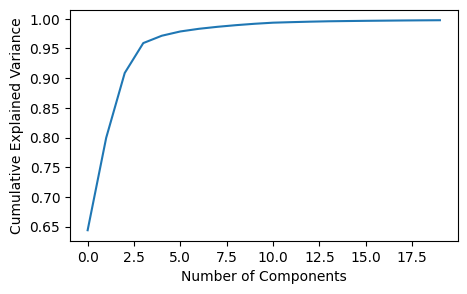

Top Cumulative Explained Variance:  0.9974992095408033


In [15]:
n_components = 20
pca = decomposition.PCA(n_components=n_components)
pca.fit(X)

plt.figure(figsize=(5, 3))
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_sum)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

print("Top Cumulative Explained Variance: ", cumulative_sum[n_components-1])

In [16]:
principal_components = pca.transform(X)

In [17]:
pc_df = pd.DataFrame(data=principal_components, columns=[f"PC{i+1}" for i in range(n_components)])
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-2.998463,2.633157,0.032932,-1.602354,0.024525,-0.617761,0.036335,-0.417612,-0.065679,0.147202,0.000601,-0.076582,0.039469,-0.027449,0.133269,-0.288124,-0.060768,0.042449,0.041903,-0.079951
1,-2.492363,1.936940,-0.138884,-0.716433,0.349365,-0.329301,-0.057881,-0.352052,0.004583,0.147736,0.058282,-0.166497,-0.101580,0.028404,0.034374,-0.167595,-0.112767,0.081890,0.051680,-0.036132
2,-2.416042,2.062777,-0.090779,-0.774755,0.208401,-0.307223,-0.085082,-0.421737,0.065456,0.167330,0.035943,-0.179506,-0.136642,0.001224,0.028825,-0.161050,-0.090177,0.097270,0.036769,-0.042106
3,-2.387253,2.206515,-0.085263,-0.904430,0.126626,-0.336002,-0.103165,-0.480135,0.050860,0.161385,0.024726,-0.174565,-0.161409,-0.022503,0.039457,-0.159132,-0.065670,0.079345,0.056077,-0.046078
4,-2.859449,2.629995,0.072997,-0.804207,0.061594,-0.190146,-0.218555,-0.508417,0.052020,0.099988,-0.034080,-0.240840,-0.144809,-0.015104,0.178606,-0.122373,-0.087124,0.087087,0.033298,-0.089053


In [18]:
pc_df["target"] = y.to_list()

In [19]:
pc_df.to_parquet("../data/principal_components_with_labels.parquet", index=False)

In [20]:
import joblib

joblib.dump(pca, '../models/pca_model.pkl')

['pca_model.pkl']